Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

2021/12/01

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://oa-icc.ipsl.fr/checking/OAICC_20211012.csv")
df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country,Year
0,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016
1,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014
2,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018
3,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019
4,"Al-Janabi, B., Kruse, I., Graiff, A., Winde, V...",doi:10.1371/journal.pone.0152948,NaN,Not included,< 2 carbonate chemistry parameters,EU-Germany,2016
...,...,...,...,...,...,...,...
2744,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013
2745,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014
2746,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019
2747,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002


In [3]:
df['Included/Not included'].unique()

array(['Not included', 'Included'], dtype=object)

In [4]:
a = df[df['Included/Not included'] == 'Included'].groupby("Country").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]
b

Country
USA                   244
EU-Germany            199
Australia             132
China                 122
EU-UK                 101
EU-France              59
Japan                  43
EU-Spain               40
Canada                 32
EU-Portugal            31
EU-Norway              30
EU-Sweden              25
EU-Italy               25
EU-Monaco              18
New Zealand            18
Chile                  16
EU-Belgium             15
EU-The Netherlands     14
Israel                  9
EU-Greece               8
China, Hong Kong        6
South Korea             6
EU-Finland              5
India                   5
EU-UK (Bermuda)         5
dtype: int64

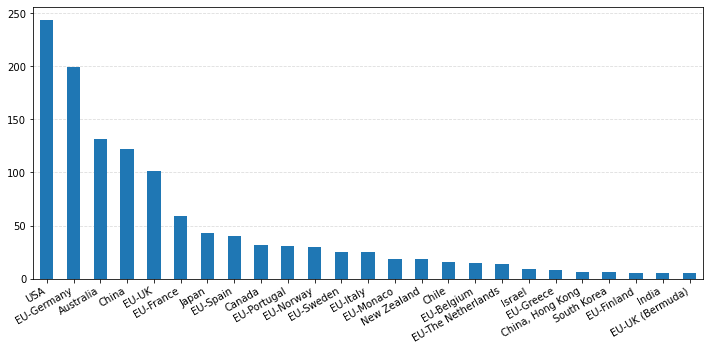

In [5]:
ax = b.plot.bar(zorder=3, figsize=[12,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [6]:
# Country2 = All EU-xxxx as EU
df['Country2'] = df['Country'].apply(lambda x: "EU" if str(x).startswith("EU-") else x)
# Country2 = EU-xxxx as xxxx
df['Country3'] = df['Country'].apply(lambda x: x.split('-')[1] if str(x).startswith("EU-") else x)
df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country,Year,Country2,Country3
0,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016,EU,Austria
1,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014,USA,USA
2,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018,EU,Portugal
3,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019,Malaysia,Malaysia
4,"Al-Janabi, B., Kruse, I., Graiff, A., Winde, V...",doi:10.1371/journal.pone.0152948,NaN,Not included,< 2 carbonate chemistry parameters,EU-Germany,2016,EU,Germany
...,...,...,...,...,...,...,...,...,...
2744,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013,EU,Germany
2745,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014,EU,Spain
2746,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019,USA,USA
2747,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002,EU,Germany


In [7]:
a = df.groupby("Country2").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]
b

Country2
EU                  1094
USA                  573
Australia            317
China                308
Japan                 85
Canada                59
New Zealand           56
Chile                 49
South Korea           34
Brazil                29
Israel                24
India                 23
Malaysia              11
China, Hong Kong      10
Mexico                 8
China, Taiwan          8
South Africa           7
Argentina              7
Indonesia              5
Philippines            5
dtype: int64

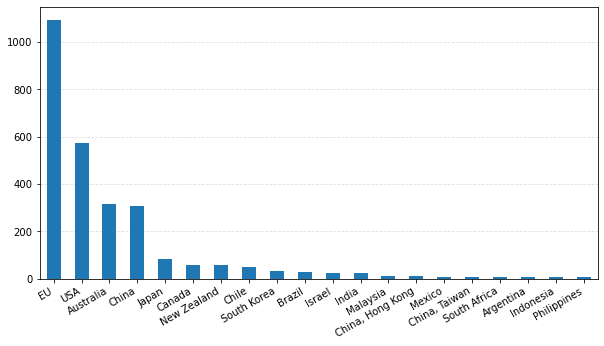

In [8]:
ax = b.plot.bar(zorder=3, figsize=[10,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

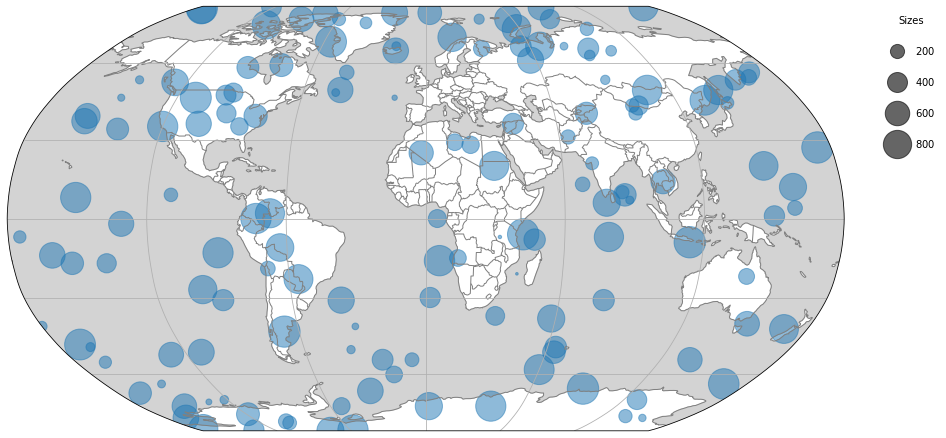

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

x = [random.randint(-180, 180) for p in range(0, 149)]
y = [random.randint(-90, 90) for p in range(0, 149)]
s = [random.randint(1, 1000) for p in range(0, 149)]

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scatter = plt.scatter(x, y, s=s, transform=ccrs.PlateCarree(), alpha=0.5)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes", 
                    bbox_to_anchor=(1.12, 1), frameon=False, labelspacing=1.9)

plt.show()

In [10]:
# https://towardsdatascience.com/things-to-do-with-latitude-longitude-data-using-geopy-python-1d356ed1ae30
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'your_app_name')

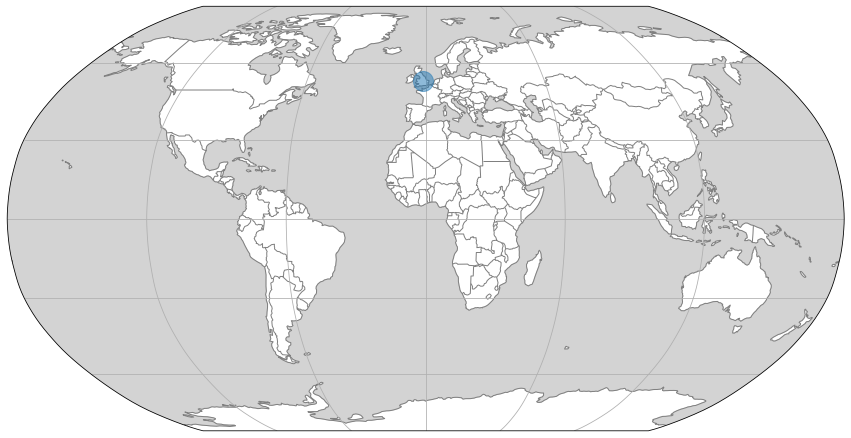

In [11]:
#text = "UK" # -3.2765753, 54.7023545
#text = "Bermuda" # -64.7603583, 32.3018217
text = "UK (Bermuda)" # -1.4789788, 52.5056354

location = geocoder.geocode(text)

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scatter = plt.plot(location.longitude, location.latitude, transform=ccrs.PlateCarree(), alpha=0.5,
                  marker='.', markersize=40)

plt.show()

### Included papers

In [12]:
a1 = df[df['Included/Not included'] == 'Included'].groupby("Country3").size()
a1.sort_values(inplace=True, ascending=False)
b1 = a1[a1 >= 5]
b1

Country3
USA                 244
Germany             199
Australia           132
China               122
UK                  102
France               59
Japan                43
Spain                40
Canada               32
Portugal             31
Norway               30
Sweden               25
Italy                25
New Zealand          18
Monaco               18
Chile                16
Belgium              15
The Netherlands      14
Israel                9
Greece                8
China, Hong Kong      6
South Korea           6
Finland               5
India                 5
UK (Bermuda)          5
dtype: int64

In [13]:
b1.index

Index(['USA', 'Germany', 'Australia', 'China', 'UK', 'France', 'Japan',
       'Spain', 'Canada', 'Portugal', 'Norway', 'Sweden', 'Italy',
       'New Zealand', 'Monaco', 'Chile', 'Belgium', 'The Netherlands',
       'Israel', 'Greece', 'China, Hong Kong', 'South Korea', 'Finland',
       'India', 'UK (Bermuda)'],
      dtype='object', name='Country3')

In [14]:
countries = ["UK","Bermuda","UK (Bermuda)"]

for c in countries:
    location = geocoder.geocode(c)
    print(c, location.longitude, location.latitude)

UK -3.2765753 54.7023545
Bermuda -64.7603583 32.3018217
UK (Bermuda) -1.4789788 52.5056354


In [15]:
# Correct 'UK (Bermuda)' to be able to locate it properly
b1.rename(index={'UK (Bermuda)':'Bermuda'}, inplace=True)
b1.index

Index(['USA', 'Germany', 'Australia', 'China', 'UK', 'France', 'Japan',
       'Spain', 'Canada', 'Portugal', 'Norway', 'Sweden', 'Italy',
       'New Zealand', 'Monaco', 'Chile', 'Belgium', 'The Netherlands',
       'Israel', 'Greece', 'China, Hong Kong', 'South Korea', 'Finland',
       'India', 'Bermuda'],
      dtype='object', name='Country3')

In [16]:
b1_geocode = b1.index.map(lambda x: geocoder.geocode(x))

In [17]:
b1[b1.index == 'France'].index.map(lambda x: geocoder.geocode(x))

Index([('France', (46.603354, 1.8883335))], dtype='object', name='Country3')

In [18]:
b1_geocode

Index([                                 ('United States', (39.7837304, -100.445882)),
                                           ('Deutschland', (51.0834196, 10.4234469)),
                                               ('Australia', (-24.7761086, 134.755)),
                                                     ('中国', (35.000074, 104.999927)),
                                        ('United Kingdom', (54.7023545, -3.2765753)),
                                                  ('France', (46.603354, 1.8883335)),
                                                   ('日本', (36.5748441, 139.2394179)),
                                                ('España', (39.3260685, -4.8379791)),
                                               ('Canada', (61.0666922, -107.991707)),
                                              ('Portugal', (40.0332629, -7.8896263)),
                                                  ('Norge', (60.5000209, 9.0999715)),
                                               ('Sveri

In [19]:
b1_lon = [g.longitude for g in b1_geocode]
b1_lat = [g.latitude for g in b1_geocode]

In [20]:
b1_lon[0], b1_lat[0], b1[0]

(-100.445882, 39.7837304, 244)

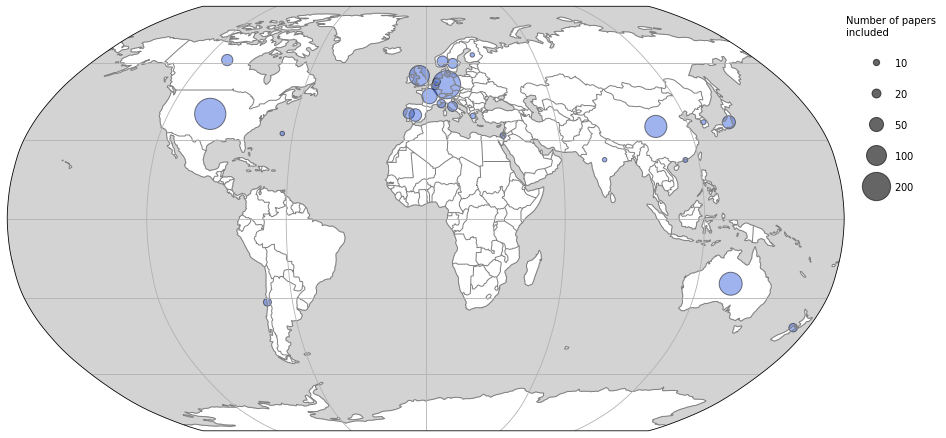

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scaleFactor = 4
scatter = plt.scatter(b1_lon, b1_lat, b1*scaleFactor, transform=ccrs.PlateCarree(), 
                      alpha=0.5, color='royalblue', edgecolor='black')

#for i in range(0,len(b1)):
#    if b1[i] >= 50:
#        plt.text(b1_lon[i], b1_lat[i], b1[i], transform=ccrs.PlateCarree(), 
#             ha="center", va="center", alpha=0.8, fontsize=8)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[10,20,50,100,200],
                                         func=lambda x: x/scaleFactor)
legend2 = ax.legend(handles, labels, loc="upper right", title="Number of papers\nincluded", 
                    bbox_to_anchor=(1.12, 1), frameon=False, labelspacing=1.9)

plt.show()

In [22]:
b1

Country3
USA                 244
Germany             199
Australia           132
China               122
UK                  102
France               59
Japan                43
Spain                40
Canada               32
Portugal             31
Norway               30
Sweden               25
Italy                25
New Zealand          18
Monaco               18
Chile                16
Belgium              15
The Netherlands      14
Israel                9
Greece                8
China, Hong Kong      6
South Korea           6
Finland               5
India                 5
Bermuda               5
dtype: int64

### Not included papers

In [23]:
a2 = df[df['Included/Not included'] == 'Not included'].groupby("Country3").size()
a2.sort_values(inplace=True, ascending=False)
b2 = a2[a2 >= 5]
b2

Country3
USA                329
China              186
Australia          185
UK                 105
Germany             79
Portugal            68
Italy               66
Spain               52
Japan               42
New Zealand         38
Chile               33
Sweden              30
South Korea         28
Canada              27
Brazil              27
France              23
Norway              21
India               18
Israel              15
Finland              8
Malaysia             8
Belgium              8
The Netherlands      8
Monaco               7
Greece               7
Mexico               6
Argentina            6
China, Taiwan        6
Poland               5
Indonesia            5
Turkey               5
Denmark              5
South Africa         5
dtype: int64

In [24]:
b2_geocode = b2.index.map(lambda x: geocoder.geocode(x))

In [25]:
b2_lon = [g.longitude for g in b2_geocode]
b2_lat = [g.latitude for g in b2_geocode]

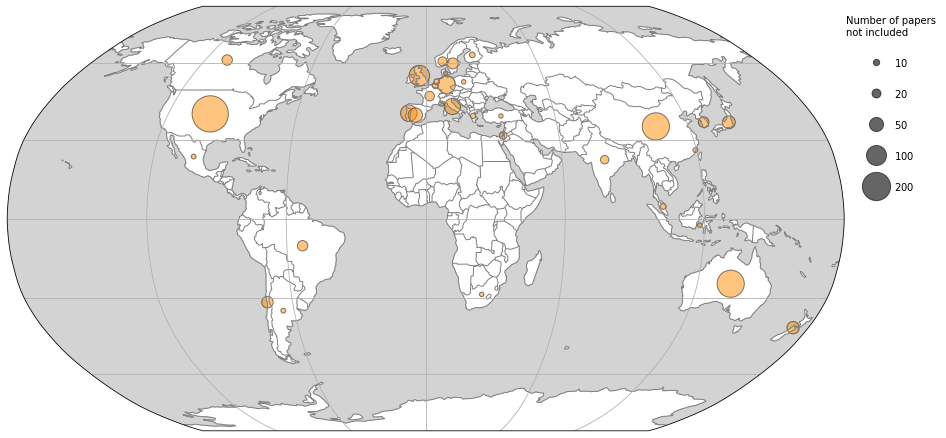

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scaleFactor = 4
scatter = plt.scatter(b2_lon, b2_lat, b2*scaleFactor, transform=ccrs.PlateCarree(), 
                      alpha=0.5, color='darkorange', edgecolor='black')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[10,20,50,100,200],
                                         func=lambda x: x/scaleFactor)
legend2 = ax.legend(handles, labels, loc="upper right", title="Number of papers\nnot included", 
                    bbox_to_anchor=(1.12, 1), frameon=False, labelspacing=1.9)

plt.show()

In [27]:
b2

Country3
USA                329
China              186
Australia          185
UK                 105
Germany             79
Portugal            68
Italy               66
Spain               52
Japan               42
New Zealand         38
Chile               33
Sweden              30
South Korea         28
Canada              27
Brazil              27
France              23
Norway              21
India               18
Israel              15
Finland              8
Malaysia             8
Belgium              8
The Netherlands      8
Monaco               7
Greece               7
Mexico               6
Argentina            6
China, Taiwan        6
Poland               5
Indonesia            5
Turkey               5
Denmark              5
South Africa         5
dtype: int64